[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ibrahim-ince/BrainTumorClassification/blob/main/data_split_csv.ipynb)

In [ ]:
!mkdir data
!unzip "/content/drive/MyDrive/TumorSiniflandirma/archive.zip" -d "/content/data/"

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
data_path = '/content/data/'

In [ ]:
def get_df(data_path):
    image_paths = []
    labels = []
    classes_list = sorted(os.listdir(data_path))
    for image_class in classes_list:
        class_path = os.path.join(data_path, image_class)
        image_list = sorted(os.listdir(class_path))
        for image in image_list:
          image_path = os.path.join(class_path, image)
          image_paths.append(image_path)
          labels.append(image_class)
        
    pd_df = pd.DataFrame({
        'image_path' : image_paths,
        'label' : labels
    })
    return pd_df

In [ ]:
data_df = get_df(data_path)

In [ ]:
num_classes = len(data_df['label'].unique())
print(f"{num_classes} Adet Sınıf")
sum = data_df.shape[0]
print(f"{sum} Adet Görüntü")

44 Adet Sınıf
4479 Adet Görüntü


In [ ]:
def count_plot(x, title, xlabel, ylabel, width, length, order = None, rotation=False, palette='winter'):
    plt.figure(figsize=(width,length))
    sns.countplot(x = x, palette=palette, order = order)
    plt.title(title, fontsize=25)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.show()

In [ ]:
data_df['label'].value_counts()

Meningioma T1C+           369
Meningioma T1             272
_NORMAL T2                271
_NORMAL T1                251
Astrocitoma T1C+          233
Meningioma T2             233
Neurocitoma T1C+          223
Schwannoma T1C+           194
Astrocitoma T1            176
Astrocitoma T2            171
Schwannoma T1             148
Neurocitoma T1            130
Schwannoma T2             123
Carcinoma T1C+            112
Papiloma T1C+             108
Neurocitoma T2            104
Glioblastoma T1C+          94
Oligodendroglioma T1       86
Tuberculoma T1C+           84
Carcinoma T2               73
Oligodendroglioma T1C+     72
Meduloblastoma T1C+        67
Papiloma T1                66
Oligodendroglioma T2       66
Carcinoma T1               66
Papiloma T2                63
Ependimoma T2              57
Glioblastoma T2            55
Glioblastoma T1            55
Ependimoma T1C+            48
Ependimoma T1              45
Meduloblastoma T2          41
Germinoma T1C+             40
Tuberculom

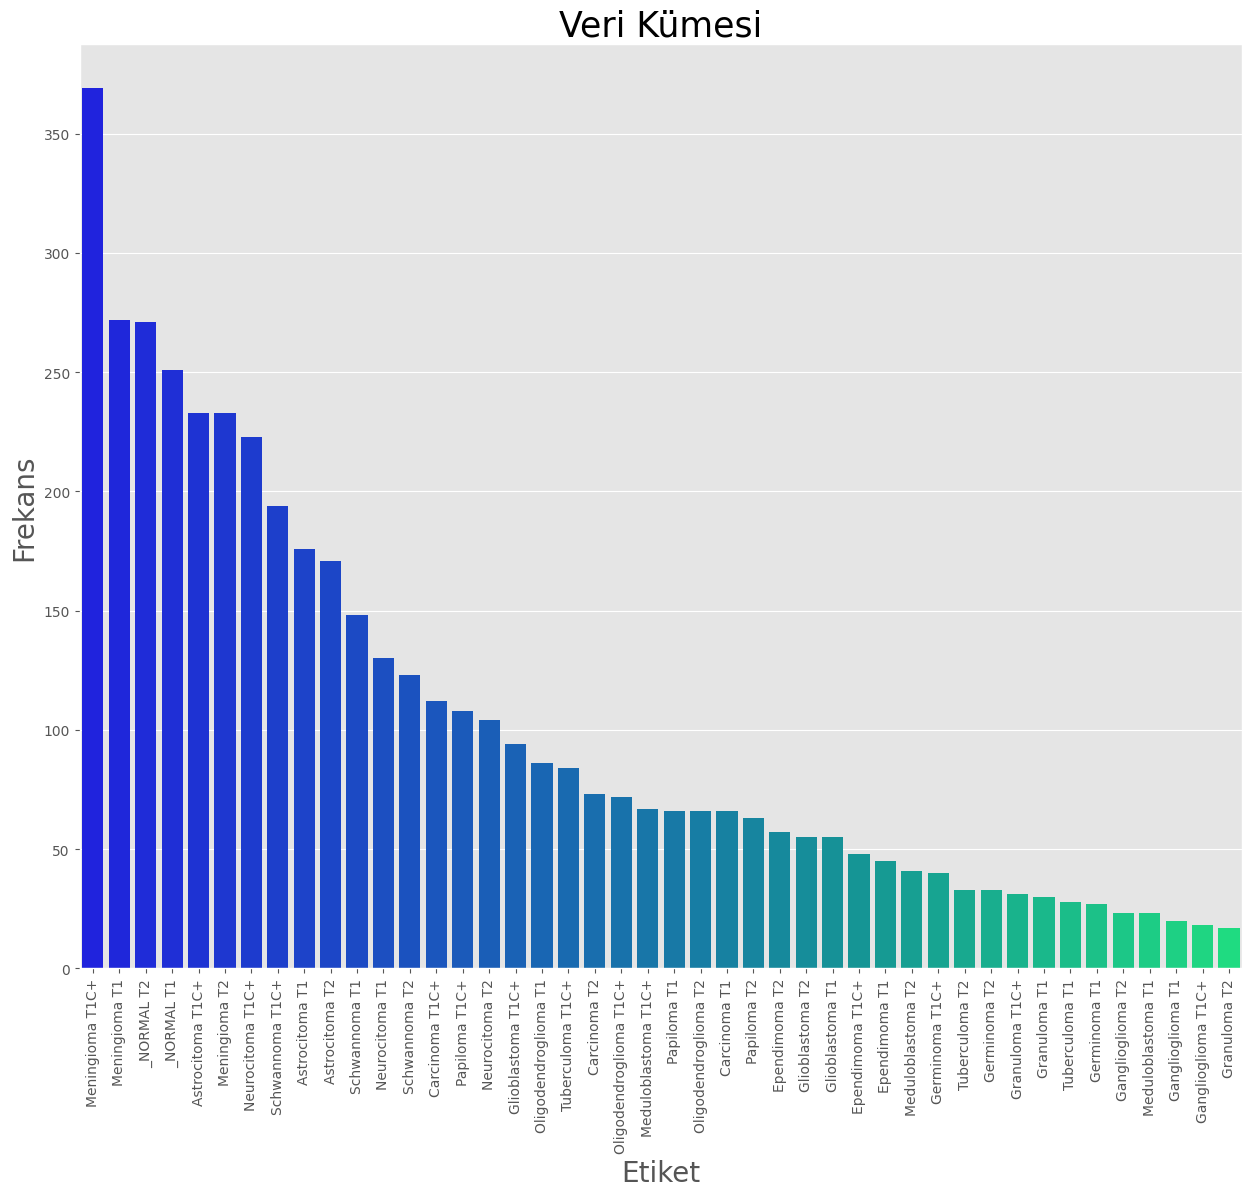

In [ ]:
x = data_df['label']
order = x.value_counts().index
count_plot(x, "Veri Kümesi", "Etiket", 'Frekans', 15,12, rotation = True, order=order)

In [ ]:
train_df, test_df = train_test_split(data_df, test_size=0.3, shuffle=True, random_state=123, stratify=data_df['label'])
test_df, valid_df = train_test_split(test_df, test_size=0.5, shuffle=True, random_state=123, stratify=test_df['label'])

In [ ]:
train_df['label'].value_counts()

Meningioma T1C+           258
_NORMAL T2                190
Meningioma T1             190
_NORMAL T1                176
Astrocitoma T1C+          163
Meningioma T2             163
Neurocitoma T1C+          156
Schwannoma T1C+           136
Astrocitoma T1            123
Astrocitoma T2            120
Schwannoma T1             104
Neurocitoma T1             91
Schwannoma T2              86
Carcinoma T1C+             78
Papiloma T1C+              76
Neurocitoma T2             73
Glioblastoma T1C+          66
Oligodendroglioma T1       60
Tuberculoma T1C+           59
Carcinoma T2               51
Oligodendroglioma T1C+     50
Meduloblastoma T1C+        47
Oligodendroglioma T2       46
Carcinoma T1               46
Papiloma T1                46
Papiloma T2                44
Ependimoma T2              40
Glioblastoma T1            38
Glioblastoma T2            38
Ependimoma T1C+            34
Ependimoma T1              31
Meduloblastoma T2          29
Germinoma T1C+             28
Germinoma 

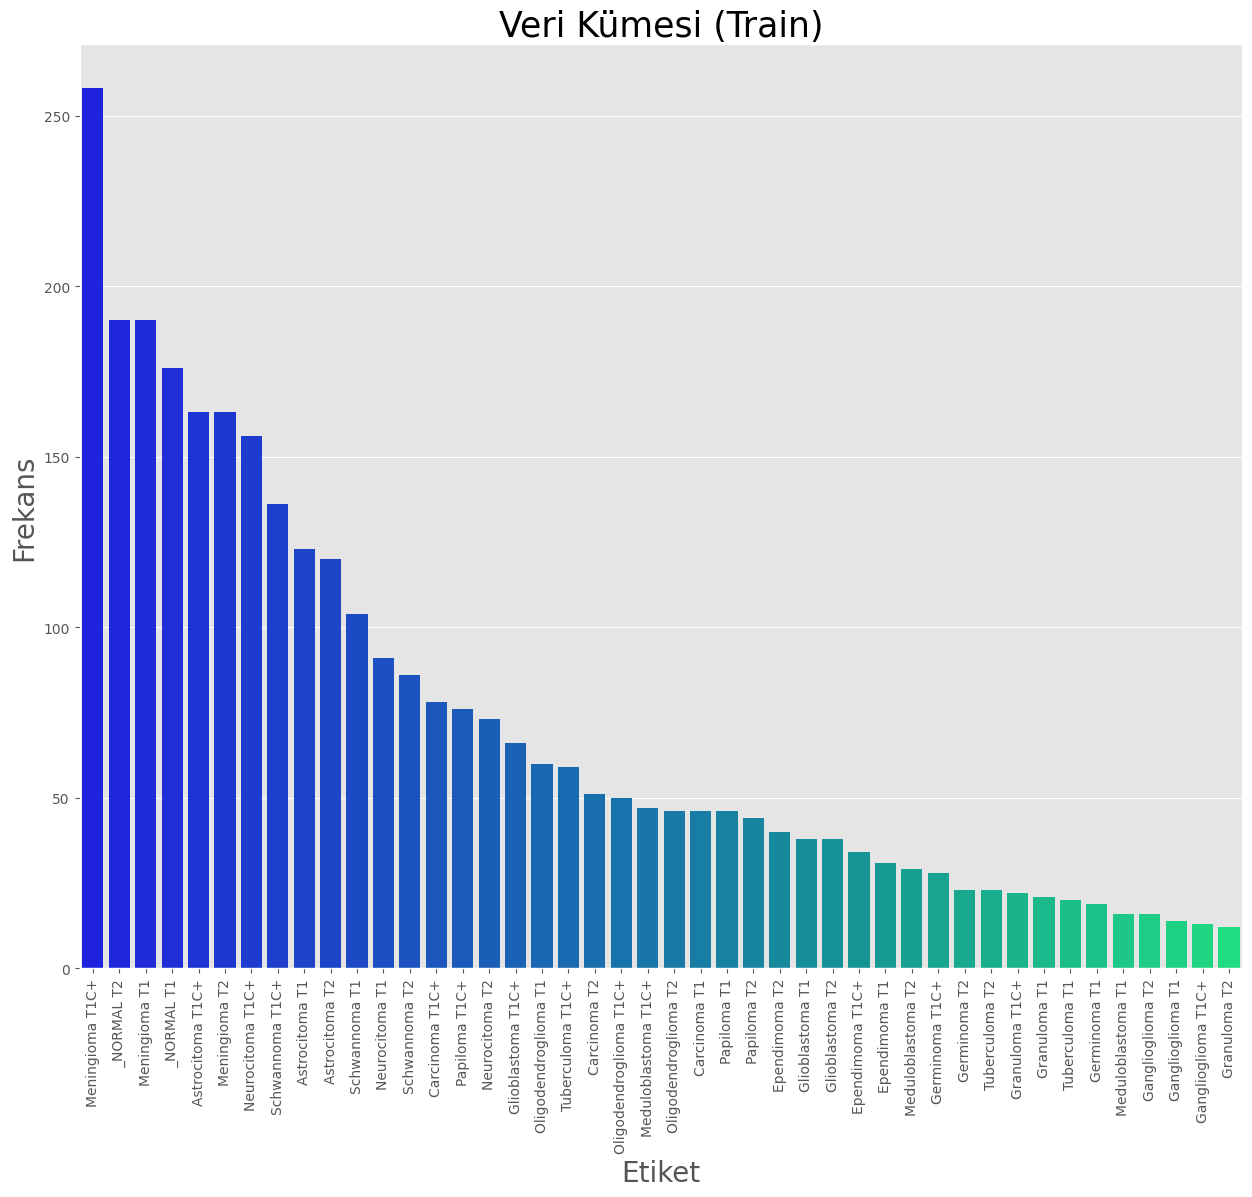

In [ ]:
x = train_df['label']
order = x.value_counts().index
count_plot(x, "Veri Kümesi (Train)", "Etiket", 'Frekans', 15,12, rotation = True, order=order)

In [ ]:
valid_df['label'].value_counts()

Meningioma T1C+           56
Meningioma T1             41
_NORMAL T2                40
_NORMAL T1                38
Astrocitoma T1C+          35
Meningioma T2             35
Neurocitoma T1C+          33
Schwannoma T1C+           29
Astrocitoma T2            26
Astrocitoma T1            26
Schwannoma T1             22
Neurocitoma T1            20
Schwannoma T2             18
Carcinoma T1C+            17
Neurocitoma T2            16
Papiloma T1C+             16
Glioblastoma T1C+         14
Oligodendroglioma T1      13
Tuberculoma T1C+          12
Carcinoma T2              11
Oligodendroglioma T1C+    11
Papiloma T1               10
Oligodendroglioma T2      10
Carcinoma T1              10
Meduloblastoma T1C+       10
Papiloma T2                9
Ependimoma T2              9
Glioblastoma T2            8
Glioblastoma T1            8
Ependimoma T1C+            7
Ependimoma T1              7
Meduloblastoma T2          6
Germinoma T1C+             6
Tuberculoma T2             5
Germinoma T2  

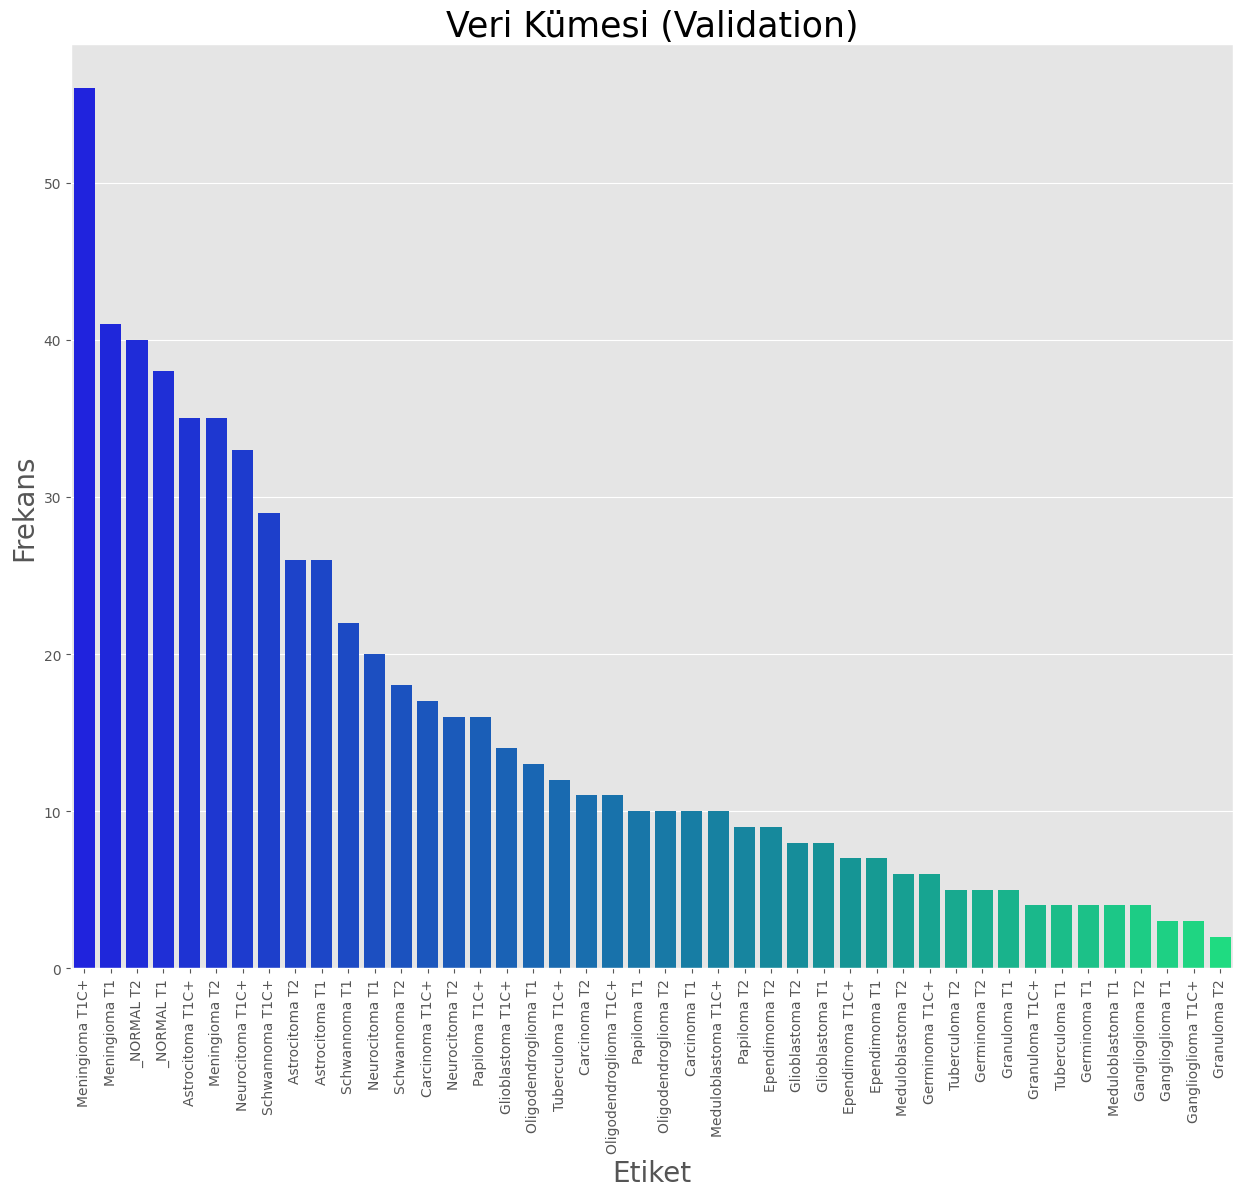

In [ ]:
x = valid_df['label']
order = x.value_counts().index
count_plot(x, "Veri Kümesi (Validation)", "Etiket", 'Frekans', 15,12, rotation = True, order=order)

In [ ]:
test_df['label'].value_counts()

Meningioma T1C+           55
Meningioma T1             41
_NORMAL T2                41
_NORMAL T1                37
Meningioma T2             35
Astrocitoma T1C+          35
Neurocitoma T1C+          34
Schwannoma T1C+           29
Astrocitoma T1            27
Astrocitoma T2            25
Schwannoma T1             22
Neurocitoma T1            19
Schwannoma T2             19
Carcinoma T1C+            17
Papiloma T1C+             16
Neurocitoma T2            15
Glioblastoma T1C+         14
Tuberculoma T1C+          13
Oligodendroglioma T1      13
Carcinoma T2              11
Oligodendroglioma T1C+    11
Carcinoma T1              10
Papiloma T1               10
Papiloma T2               10
Oligodendroglioma T2      10
Meduloblastoma T1C+       10
Glioblastoma T1            9
Glioblastoma T2            9
Ependimoma T2              8
Ependimoma T1C+            7
Ependimoma T1              7
Meduloblastoma T2          6
Germinoma T1C+             6
Tuberculoma T2             5
Germinoma T2  

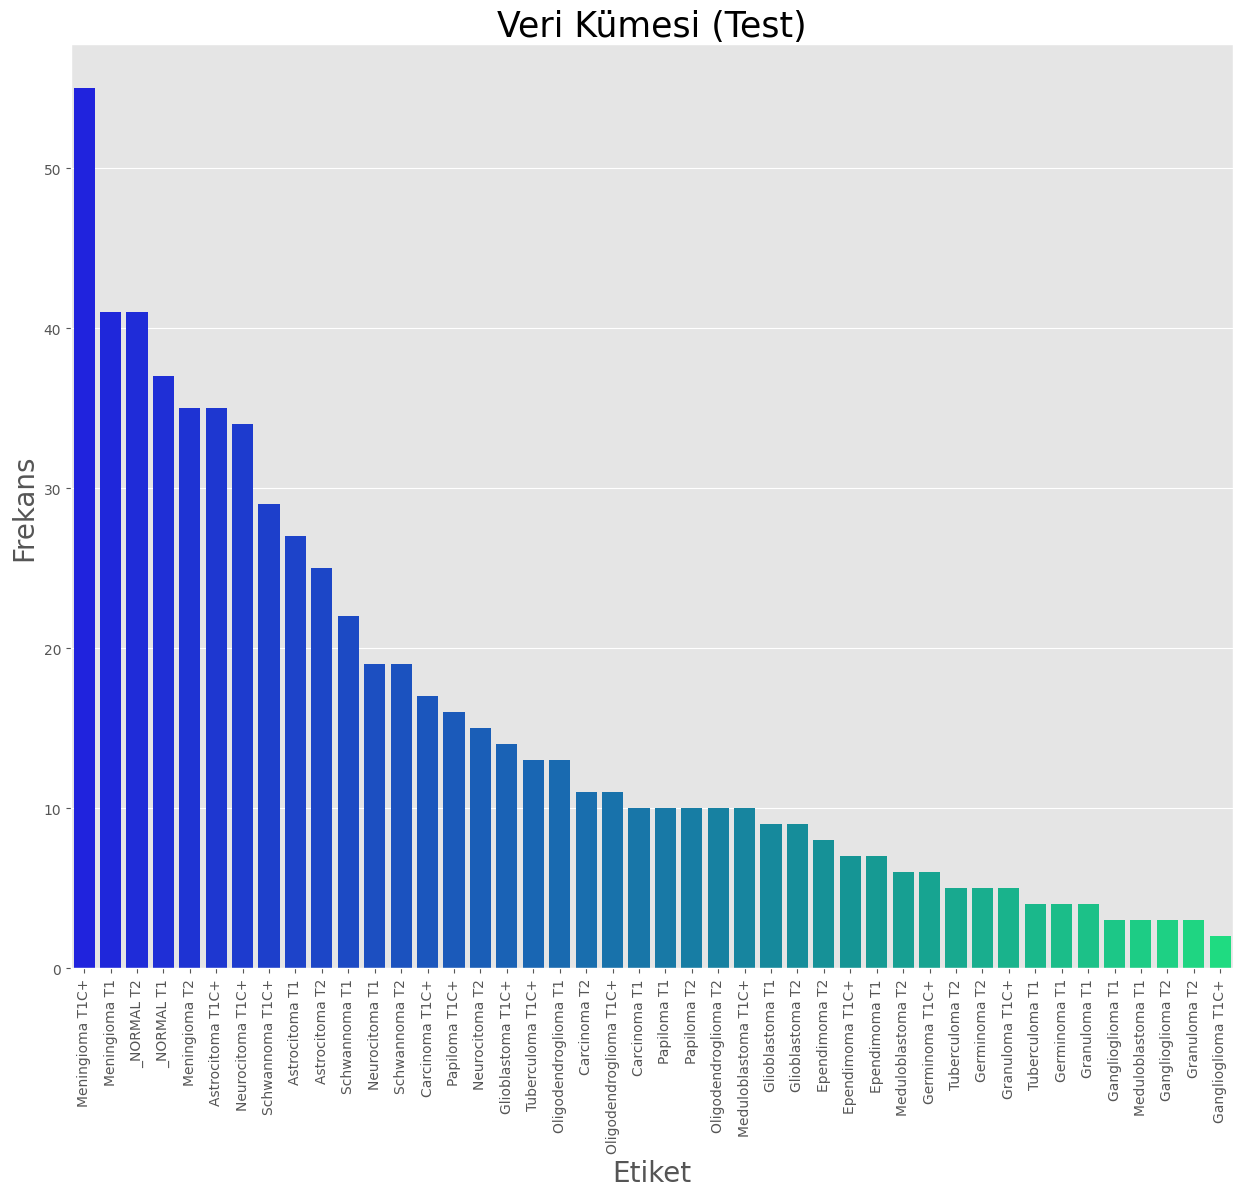

In [ ]:
x = test_df['label']
order = x.value_counts().index
count_plot(x, "Veri Kümesi (Test)", "Etiket", 'Frekans', 15,12, rotation = True, order=order)

In [ ]:
train_df.to_csv("/content/drive/MyDrive/TumorSiniflandirma/train.csv")

In [ ]:
valid_df.to_csv("/content/drive/MyDrive/TumorSiniflandirma/valid.csv")

In [ ]:
test_df.to_csv("/content/drive/MyDrive/TumorSiniflandirma/test.csv")